### Studying Block 3

\begin{equation*}
 \det\left(\begin{bmatrix}
p_{44} &  p_{45} \\
p_{54} &  p_{55}
\end{bmatrix}\right)=p_{44}p_{55} - p_{45}^2
\end{equation*}


In [1]:
def simplify_local(p, repeat=2):
    c = var('c')    
    i=0
    while i<repeat:
        p = p.collect(c).combine(deep=True)
        lst0 = p.coefficients(c)    
        lst = []    
        for l0 in lst0:
            expr0, k = l0
            lst1 = expr0.operands()
            if len(lst1)<2:
                lst.append(expr0*c^k)
            for expr1 in lst1:
                try:
                    expr1 = expr1.canonicalize_radical().factor()
                except AttributeError:
                    continue
                #if len(p.variables())==1:
                #    pass
                expr1 = expr1*c^k
                lst.append(expr1)
        p = sum(lst).collect(c).combine(deep=True)
        i+=1
    return p

In [2]:
B3 = load('B3')
var('t')
assume(t>0, t<1)

### Block Entries 

In [3]:
p44 = B3[0][0]                 # Original
p44 = simplify_local(p44,2)    # Simplificado
show(p44)

24*c^2 - c*(4*sqrt(2) + 16/(t^2 + 1)^(3/2) + 4/(t + 1)^2 + 4/(t - 1)^2 + 1) + 8/(t^2 + 1)^3 + 1/(t + 1)^4 + 1/(t - 1)^4 + 2/((t + 1)^2*(t - 1)^2) + 17/16

In [4]:
p55 = B3[1][1]              # Original
p55 = simplify_local(p55,2) # Simplificado
show(p55)

(t^2 + 24)*c^2 - c*(16*t^2/(t^2 + 1)^(3/2) + (4*sqrt(2) + 1)/t + 4*t/(t + 1)^2 - 4*t/(t - 1)^2) + 8*t^2/(t^2 + 1)^3 + 1/(t + 1)^4 + 1/(t - 1)^4 - 2/((t + 1)^2*(t - 1)^2) + 17/16/t^4

In [5]:
p54 = B3[1][0]               # Original
p54 = simplify_local(p54,2)  # Simplificado
show(p54)

c^2*(t + 24) - 1/2*(4*sqrt(2)*t + t + 32*t/(t^2 + 1)^(3/2) + 4/(t + 1) + 4/(t - 1) + (4*sqrt(2) + 1)/t^2)*c + 2*sqrt(2)*t/(t^2 + 1)^(3/2) + 1/4/(t + 1)^2 - 1/4/(t - 1)^2 + 2*sqrt(2)/((t^2 + 1)^(3/2)*t^2) + 1/4/((t + 1)^3*t) + 1/4/((t - 1)^3*t) + 1/4/((t + 1)^3*t^2) - 1/4/((t - 1)^3*t^2)

In [6]:
p45 = B3[0][1]                # Original
p45 = simplify_local(p45,2)   # Simplificado
show(p45)

c^2*(t + 24) - 1/2*(4*sqrt(2)*t + t + 32*t/(t^2 + 1)^(3/2) + 4/(t + 1) + 4/(t - 1) + (4*sqrt(2) + 1)/t^2)*c + 2*sqrt(2)*t/(t^2 + 1)^(3/2) + 1/4/(t + 1)^2 - 1/4/(t - 1)^2 + 2*sqrt(2)/((t^2 + 1)^(3/2)*t^2) + 1/4/((t + 1)^3*t) + 1/4/((t - 1)^3*t) + 1/4/((t + 1)^3*t^2) - 1/4/((t - 1)^3*t^2)

### Determinant

In [8]:
import matplotlib.pyplot as plt
import numpy as np

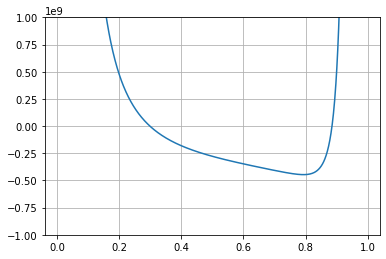

In [95]:
det = p44*p55 - p45**2
det = det(c=60)                       # Escolhendo c = 60
x = np.linspace(0.01,0.99, 1000)
y = np.array([det(t=x0).n() for x0 in x])
fig, ax = plt.subplots()
plt.plot(x, y)
plt.ylim([-1e9, 1e9])
plt.grid()
plt.show()

### Strategy

- Para $c=60$ têm-se:  $\det(2/10)> 0$ e $\det(3/10)<0$. Logo, é possível usar o teorema do valor intermediário.

In [96]:
bool(det(t=2/10)>0)

True

In [97]:
bool(det(t=3/10)<0)

True